# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?


It appears that the number of marketing campaigns is flound the 'campaign' feature of the dataset. 
I used the sum of the numerical values here because multiple campaigns can be conducted on a single user over time, until certain criteria is met to officially justify closing a campaign. I believe just running a count on the shape of the dataframe would
be misleading to in this context.

#df['campaign'].sum() = 10451 Number of campagins

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [653]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_text, plot_tree
from sklearn.ensemble import VotingClassifier
from itertools import product
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report


from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay,mean_squared_error,accuracy_score,PrecisionRecallDisplay,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.inspection import DecisionBoundaryDisplay
import time



import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [603]:
df = pd.read_csv('/Users/jubacochran/Downloads/AI_ML_UC_Berkeley/Part_2_Machine_Learning_and_AI_Techniques/Module_17_Practical_Application_3/comparing_classifiers/module_17_starter/data/bank-additional-full.csv', delimiter =';')

In [604]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


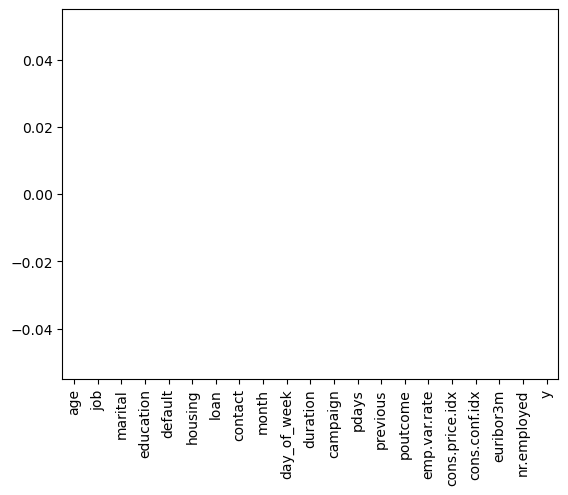

In [605]:

#Plotting null values in each feature
print(df.isnull().sum().plot.bar())
print(df.isna().sum().plot.bar())



In [606]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

#df_ints = df.select_dtypes(['int64','float64'])
#df_object = df.select_dtypes(['object'])
#print(df_object.info())
#print(df_ints.info())

y
Failure       36548
Successful     4640
Name: count, dtype: int64

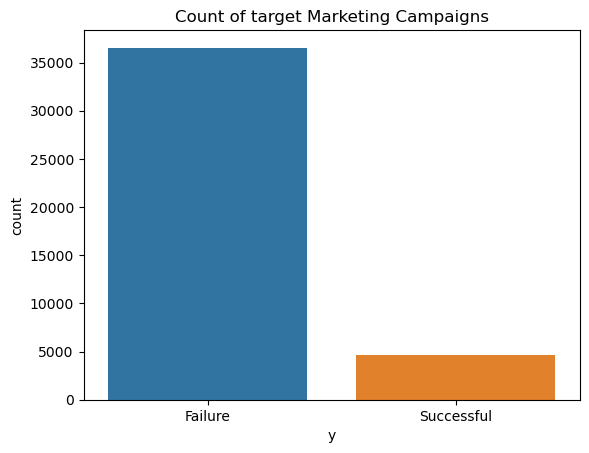

In [607]:
df['y'] = np.where(df['y']== 'yes', 'Successful', 'Failure')

sns.countplot(data=df, x = 'y')
plt.title('Count of target Marketing Campaigns')
df['y'].value_counts()


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business goal is to find a model that can explain success of a contact. This data will be used to create direct campaign marketing to potential buying customers. We'll attempt to identify the top categories for both success and failure in order to provide as much information for effective business decisions. 

In [608]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Failure
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Failure
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Failure
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Failure
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Failure


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [609]:
# Encode the target variable separately
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['y'])
print(y_encoded[:20])
#Grabbing features
X = df.drop(columns=['y','duration'])


# Seperating X data types
df_ints = X.select_dtypes(['int64', 'float64'])
df_object = X.select_dtypes(['object'])
print(df_object.info())


# Creating the transformer for scaling and encoding
transform = make_column_transformer(
    (StandardScaler(), df_ints.columns),
    (OneHotEncoder(), df_object.columns)
)

#Fit transformer on features of X
transform.fit(X)
transformed_features = transform.get_feature_names_out()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB
None


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [610]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state = 45)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [611]:
baselineLinrPipeline = Pipeline([('transform', transform),('Linr', LinearRegression())]).fit(X,y_encoded)

baselineLinrPipeline.score(X_train,y_train)

0.21770857933672672

In [612]:
preds = baselineLinrPipeline.predict(X_train)

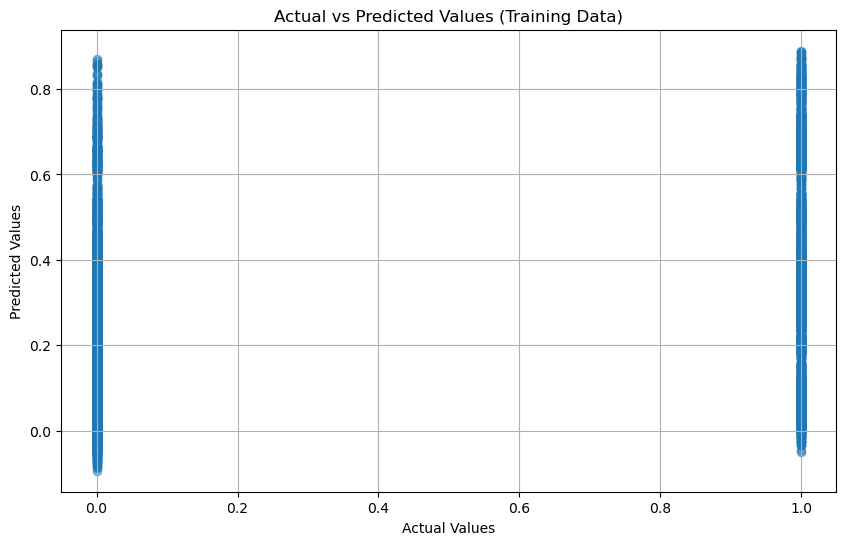

In [613]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Data)')
plt.grid(True)
plt.show()


It appears that the data is at least linear. I may consider using PCA in the later part of this excercise. 

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [614]:
start_time = time.time()

lgrPipeline = Pipeline([('transform',transform),('logisticRegression',LogisticRegression(C=0.1,max_iter=1000))]).fit(X,y_encoded)

end_time = time.time()

lgrRunTime = end_time-start_time


### Problem 9: Score the Model

What is the accuracy of your model?

In [615]:
lgrScore_Train = lgrPipeline.score(X_train,y_train)
lgrScore_Test = lgrPipeline.score(X_test,y_test)

print(lgrScore_Test,lgrScore_Train)



0.8975429736816548 0.9015247159366806


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [616]:
modelComparisonMeta = {}

# start time

start_time = time.time()

# Creating simple pipeline for KNN
knnPipeline = Pipeline([('transform',transform),('knn',KNeighborsClassifier())]).fit(X_train,y_train)
knnScore_Train = accuracy_score(y_train,knnPipeline.predict(X_train))
knnScore_Test = accuracy_score(y_test,knnPipeline.predict(X_test))
#End Time
end_time = time.time()

knnRunTime = end_time-start_time


print(modelComparisonMeta)


{}


In [617]:
# start time

start_time = time.time()

dTreePipeline = Pipeline([('transform',transform),('tree',DecisionTreeClassifier())]).fit(X_train,y_train)
dTreeScore_Train = accuracy_score(y_train,dTreePipeline.predict(X_train))
dTreeScore_Test = accuracy_score(y_test,dTreePipeline.predict(X_test))

# End Time
end_time = time.time()

dTreerunTime = end_time-start_time
print(dTreerunTime)

modelComparisonMeta = {'Model':'DecisionTree','Train Time':dTreerunTime,'Train Accuracy':dTreeScore_Train,'Test Accuracy':dTreeScore_Test}
print(modelComparisonMeta)

#plot_tree(dTreePipeline.named_steps['tree'], feature_names=transformed_features, filled=True)


0.23248624801635742
{'Model': 'DecisionTree', 'Train Time': 0.23248624801635742, 'Train Accuracy': 0.9953708199799294, 'Test Accuracy': 0.8445178207244829}


In [618]:
# start time

start_time = time.time()

svmPipeline = Pipeline([('transform',transform),('svm',SVC())]).fit(X_train,y_train)
svmScore_Train = accuracy_score(y_train,svmPipeline.predict(X_train))
svmScore_Test = accuracy_score(y_test,svmPipeline.predict(X_test))
print(svmScore_Train)
print(svmScore_Test)
#End Time
end_time = time.time()

svmRunTime = end_time-start_time
print(svmRunTime)

0.9059596646272378
0.8979314363406817
67.624027967453


In [619]:
# Creating dataframe for model metrics and storing. 
modelComparisonMeta= {

    'model':['LogisticRregression','KNN','DecisionTree','SVM'],

    'Train Time': [lgrRunTime,knnRunTime,dTreerunTime,svmRunTime],

    'Train Accuracy': [lgrScore_Train,knnScore_Train,dTreeScore_Train,svmScore_Train],

    'Test Accuracy': [lgrScore_Test,knnScore_Test,dTreeScore_Test,svmScore_Test]

}

print(modelComparisonMeta)

modelComparisonPD = pd.DataFrame.from_dict(modelComparisonMeta)

print(modelComparisonPD)


{'model': ['LogisticRregression', 'KNN', 'DecisionTree', 'SVM'], 'Train Time': [0.33603620529174805, 1.6016488075256348, 0.23248624801635742, 67.624027967453], 'Train Accuracy': [0.9015247159366806, 0.9142792399080638, 0.9953708199799294, 0.9059596646272378], 'Test Accuracy': [0.8975429736816548, 0.8860833252403613, 0.8445178207244829, 0.8979314363406817]}
                 model  Train Time  Train Accuracy  Test Accuracy
0  LogisticRregression    0.336036        0.901525       0.897543
1                  KNN    1.601649        0.914279       0.886083
2         DecisionTree    0.232486        0.995371       0.844518
3                  SVM   67.624028        0.905960       0.897931


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [620]:
# Looking for features to select for logistic regression model by using L1 Lasso Regularization
lgrPipelineSelector = Pipeline([
    ('transform', transform),
    ('selector', SelectFromModel(estimator=LogisticRegression(C=0.1,max_iter=1000))),
    ('logisticRegression', LogisticRegression())
])

# Fitting the pipeline
lgrPipelineSelector.fit(X_train, y_train)


# Extracting the selected feature names
selected_features_mask = lgrPipelineSelector.named_steps['selector'].get_support()
selected_feature_names = np.array(lgrPipelineSelector.named_steps['transform'].get_feature_names_out())[selected_features_mask]

print("Selected Features:", selected_feature_names)






Selected Features: ['standardscaler__pdays' 'standardscaler__emp.var.rate'
 'standardscaler__cons.price.idx' 'standardscaler__euribor3m'
 'onehotencoder__job_retired' 'onehotencoder__job_student'
 'onehotencoder__contact_cellular' 'onehotencoder__contact_telephone'
 'onehotencoder__month_aug' 'onehotencoder__month_dec'
 'onehotencoder__month_jun' 'onehotencoder__month_mar'
 'onehotencoder__month_may' 'onehotencoder__month_nov'
 'onehotencoder__day_of_week_mon' 'onehotencoder__poutcome_failure'
 'onehotencoder__poutcome_success']


In [ ]:
# Hypertuning Logistic regression model with range of regularization values
params = {
    'selector__estimator__C':[0.01, 0.1, 1],
    'logisticRegression__C': [0.01, 0.1,0.25,.5,1,1.5],
    'logisticRegression__penalty':['l1'],
    'logisticRegression__solver':['liblinear','saga'],
    'logisticRegression__max_iter':[1000],
    'logisticRegression__class_weight':['balanced'],
    'logisticRegression__max_iter':[1000,5000]
}

# Perform GridSearchCV
lgrGridSearch = GridSearchCV(lgrPipelineSelector, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
lgrGridSearch.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", lgrGridSearch.best_params_)
print("Best Accuracy Score:", lgrGridSearch.best_score_)

# Extracting the feature names from the best estimator
lgrBestPipeline = lgrGridSearch.best_estimator_
print(lgrBestPipeline)

# Extracting the selected features after grid search
best_selected_features = np.array(lgrBestPipeline.named_steps['transform'].get_feature_names_out())[lgrBestPipeline.named_steps['selector'].get_support()]
print("Selected Features after Grid Search:", best_selected_features)

In [622]:

# Transform both training and test data
X_train_transformed = transform.transform(X_train)
X_test_transformed = transform.transform(X_test)

# Select the features based on the mask obtained from SelectFromModel
X_train_selected = X_train_transformed[:, selected_features_mask]
X_test_selected = X_test_transformed[:, selected_features_mask]

# Fit the final Logistic Regression model on the selected features
lgr_EvaluationPipeline = LogisticRegression(
    C=0.5, max_iter=1000, class_weight='balanced', penalty='l1', solver='liblinear'
)

lgr_EvaluationPipeline.fit(X_train_selected, y_train)

# Evaluate the model on the test data
y_pred = lgr_EvaluationPipeline.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.4f}')

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy on test data: 0.8299
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      9108
           1       0.36      0.61      0.45      1189

    accuracy                           0.83     10297
   macro avg       0.65      0.73      0.68     10297
weighted avg       0.88      0.83      0.85     10297



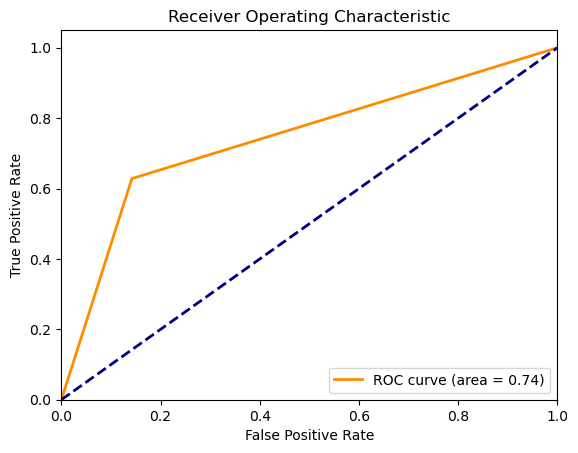

In [623]:
y_prob = lgr_EvaluationPipeline.predict(X_train_selected)
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Findings for the Regression model:

Firstly, there is an imbalance in the target classes for y. I used the 'balanced' setting in the class_weight parameter of the Logistic Regression model to address this issue. Although the model achieved an accuracy of 0.8299 on the test data, it only has an above-average recall for true positives, at about 74%. This level of recall could result in missing many business opportunities, so I plan to explore different models. Additionally, I applied feature selection using Lasso (L1 regularization) to reduce the dimensionality of the dataset after encoding, in hopes of capturing more relevant statistical data in my model.

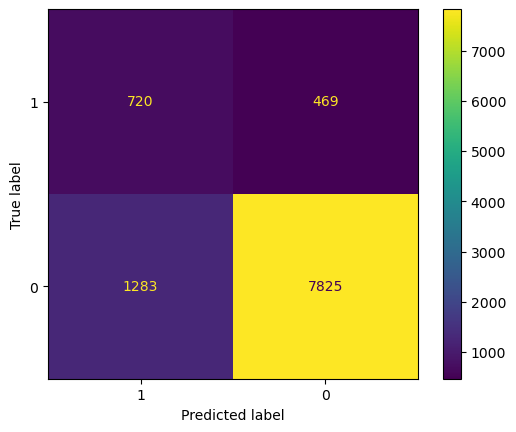

In [624]:
logr_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix = logr_matrix, display_labels=[1,0])
disp.plot()
plt.show()


TP = 720 Class 1
FN = 469 Class 1
FP = 1283 Class 0
TN = 7825 Class 0
In the next models, I'll keep all feature data and will instead use decision boundry logic in order to better classify data.

In [ ]:
#Knn Improvement

knn_params = {
    'knn__n_neighbors':range(100,300,50),
    'knn__weights':['distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p':[1,2,3]

}

# Setup GridSearchCV
knnGridSearch = GridSearchCV(knnPipeline, param_grid=knn_params, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model on the training data
knnGridSearch.fit(X_train, y_train)

# Predict on the training set
knnPreds = knnGridSearch.predict(X_train)
(print(knnGridSearch.best_params_))
(print(knnGridSearch.cv_results_))
(print(knnGridSearch.best_score_))
# Predict probabilities on the test set
knnProbas = knnGridSearch.predict_proba(X_test)
knnProbaDF = pd.DataFrame(knnProbas, columns=['p_no', 'p_yes'])

print(knnProbaDF)






In [626]:
#Threshold
knn_threshold = 0.6

# Predict class labels based on the custom threshold
knnPreds_custom_threshold = (knnProbas[:, 1] >= knn_threshold).astype(int)

# Evaluate the model using the custom threshold
precision = precision_score(y_test, knnPreds_custom_threshold)
recall = recall_score(y_test, knnPreds_custom_threshold)
f1 = f1_score(y_test, knnPreds_custom_threshold)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Precision: 0.6206
Recall: 0.1775
F1-Score: 0.2760


In [627]:
knn_evaluationPipeline = Pipeline([('transform',transform),('knn',KNeighborsClassifier( metric='minkowski', n_neighbors = 100, p= 3, weights='distance'))])
knn_evaluationPipeline.fit(X_train,y_train)
knn_evaluationPipeline.predict(X_train)
knn_evaluationPipeline.score(X_test,y_test)
precision_score(y_test,knnPreds_custom_threshold)


0.6205882352941177

In [628]:
# Evaluate the model using the custom threshold
precision = precision_score(y_test, knnPreds_custom_threshold)
recall = recall_score(y_test, knnPreds_custom_threshold)
f1 = f1_score(y_test, knnPreds_custom_threshold)
accuracy = accuracy_score(y_test,knnPreds_custom_threshold)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')


Precision: 0.6206
Recall: 0.1775
F1-Score: 0.2760
Accuracy: 0.8925


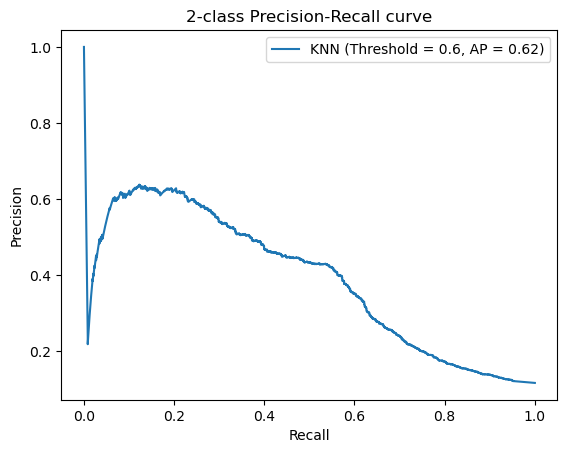

In [629]:
# Calculate precision-recall curve for the custom threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, knnProbas[:, 1])

# Plot Precision-Recall curve
plt.figure()
plt.plot(recalls, precisions, label=f'KNN (Threshold = {knn_threshold}, AP = {precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve')
plt.legend(loc='best')
plt.show()

Since the model is imbalanced and we have to take the business case into consideration, I don't want to push the percision any higher due to the recall issue. I'm sure the business would want to predict more of those usecases. Setting a threshold has improved the model post threshold definition. But in reality we wouldn't use this model because of the lack of robustness of predictibility of the recall score. I've tried many ranges of threshold but the recall stays at about 17%. We need those true positives as well. Moving to the next model. 

In [630]:
print(selected_feature_names)

dTreePipeline2 = Pipeline([
    ('tree',DecisionTreeClassifier(class_weight='balanced'))

])
dtParam = {

    'tree__min_impurity_decrease': [0.001,0.01,0.02,0.03],
    'tree__max_depth': [3,5,10,15],
    'tree__min_samples_split': [.001,0.1,0.2,0.05],
    'tree__criterion':['entropy','gini'],
    'tree__min_samples_leaf':[1,5,10,20,30],
    'tree__max_leaf_nodes':[None,40,50,60,70]
}


dtreeGridSearch = GridSearchCV(dTreePipeline2, param_grid=dtParam, scoring='accuracy', cv=5, n_jobs=-1)
dtreeGridSearch.fit(X_train_selected, y_train)
# Output the best parameters and the best score
print("Best Parameters for Decision Tree:", dtreeGridSearch.best_params_)
print("Best Accuracy Score for Decision Tree:", dtreeGridSearch.best_score_)

# Evaluate on test set
y_pred_dt = dtreeGridSearch.best_estimator_.predict(X_test_selected)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy on test data with Decision Tree: {dt_accuracy:.4f}')

# Print the classification report
print(classification_report(y_test, y_pred_dt))


['standardscaler__pdays' 'standardscaler__emp.var.rate'
 'standardscaler__cons.price.idx' 'standardscaler__euribor3m'
 'onehotencoder__job_retired' 'onehotencoder__job_student'
 'onehotencoder__contact_cellular' 'onehotencoder__contact_telephone'
 'onehotencoder__month_aug' 'onehotencoder__month_dec'
 'onehotencoder__month_jun' 'onehotencoder__month_mar'
 'onehotencoder__month_may' 'onehotencoder__month_nov'
 'onehotencoder__day_of_week_mon' 'onehotencoder__poutcome_failure'
 'onehotencoder__poutcome_success']


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
306085.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
306085.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYD

Best Parameters for Decision Tree: {'tree__criterion': 'entropy', 'tree__max_depth': 10, 'tree__max_leaf_nodes': None, 'tree__min_impurity_decrease': 0.001, 'tree__min_samples_leaf': 10, 'tree__min_samples_split': 0.001}
Best Accuracy Score for Decision Tree: 0.8360684700961091
Accuracy on test data with Decision Tree: 0.8365
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      9108
           1       0.37      0.60      0.46      1189

    accuracy                           0.84     10297
   macro avg       0.66      0.73      0.68     10297
weighted avg       0.88      0.84      0.85     10297



In [631]:
dt_EvaluationPipeline = Pipeline([('tree',DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=10,max_leaf_nodes=None,min_impurity_decrease=0.001,min_samples_leaf=10, min_samples_split=0.001))])
dt_EvaluationPipeline.fit(X_train_selected,y_train)
dt_EvaluationPipeline.predict(X_train_selected)
y_pred_dt = dt_EvaluationPipeline.predict(X_test_selected)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(dt_accuracy)



0.8364572205496746


Voting Classifier Accuracy: 0.8409
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      9108
           1       0.38      0.58      0.46      1189

    accuracy                           0.84     10297
   macro avg       0.66      0.73      0.68     10297
weighted avg       0.88      0.84      0.86     10297



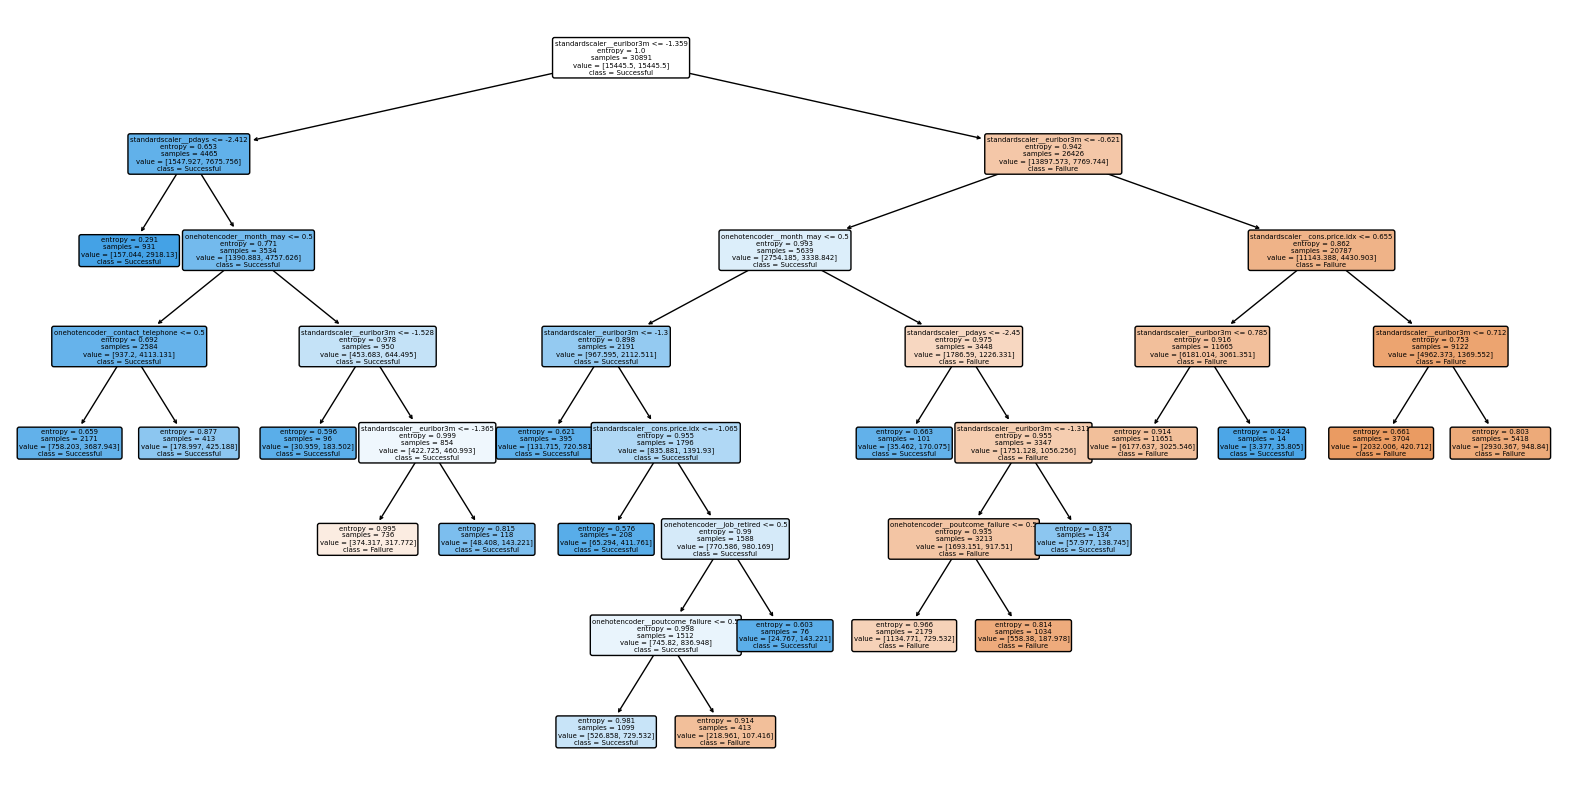

In [632]:
# Define the VotingClassifier with both models
voting_clf = VotingClassifier(
    estimators=[
        ('logistic', lgr_EvaluationPipeline),
        ('dt', dt_EvaluationPipeline)
    ],
    voting='hard'
)

# Fit the VotingClassifier
voting_clf.fit(X_train_selected, y_train)

# Predict with the VotingClassifier
y_pred_voting = voting_clf.predict(X_test_selected)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Accuracy: {voting_accuracy:.4f}')

# Print the classification report
print(classification_report(y_test, y_pred_voting))

# Access and plot the Decision Tree from the VotingClassifier
fitted_dt = voting_clf.named_estimators_['dt'].named_steps['tree']

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(fitted_dt, feature_names=selected_feature_names, filled=True, rounded=True, class_names=label_encoder.classes_,fontsize=5)
plt.show()

Considering the imbalance again, I'm really happy with the weighted average numbers of the model. 

In [657]:
#Considering PCA
print(X_train_transformed.shape, y_train.shape)
print(X_test_transformed.shape, y_test.shape)

(30891, 62) (30891,)
(10297, 62) (10297,)


In [696]:
svmPipeline2 = Pipeline([('svm',SVC(class_weight='balanced'))])

svc_params = {
    
    'svm__kernel': ['poly'],
    'svm__gamma': [0.1],
    'svm__C': [1],
    'svm__degree':[2]

         }

svcGridSearch = GridSearchCV(svmPipeline2,param_grid=svc_params,scoring='recall', n_jobs=-1, cv=5)
svcGridSearch.fit(X_train_selected,y_train)

# Output the best parameters and the best score
print("Best Parameters for SVM:", svcGridSearch.best_params_)
print("Best Accuracy Score for SVM:", svcGridSearch.best_score_)

# Evaluate on test set
y_pred_sv = svcGridSearch.best_estimator_.predict(X_test_selected)
sv_accuracy = accuracy_score(y_test, y_pred_sv)
print(f'Accuracy on test data with SVM: {sv_accuracy:.4f}')

# Print the classification report
print(classification_report(y_test, y_pred_sv))



Best Parameters for SVM: {'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}
Best Accuracy Score for SVM: 0.62445604983326
Accuracy on test data with SVM: 0.8313
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      9108
           1       0.36      0.60      0.45      1189

    accuracy                           0.83     10297
   macro avg       0.65      0.73      0.68     10297
weighted avg       0.88      0.83      0.85     10297



In [697]:
#Running PCA
# Apply PCA to reduce features to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)


In [698]:
svc_Evaluation = SVC(kernel=svcGridSearch.best_params_['svm__kernel'],
                             C=svcGridSearch.best_params_['svm__C'],
                             gamma=svcGridSearch.best_params_['svm__gamma'],
                             degree=svcGridSearch.best_params_['svm__degree'],
                             class_weight='balanced'
                             )

svc_Evaluation.fit(X_train_pca,y_train)
svc_Evaluation.predict(X_test_pca)



array([1, 1, 0, ..., 0, 0, 0])

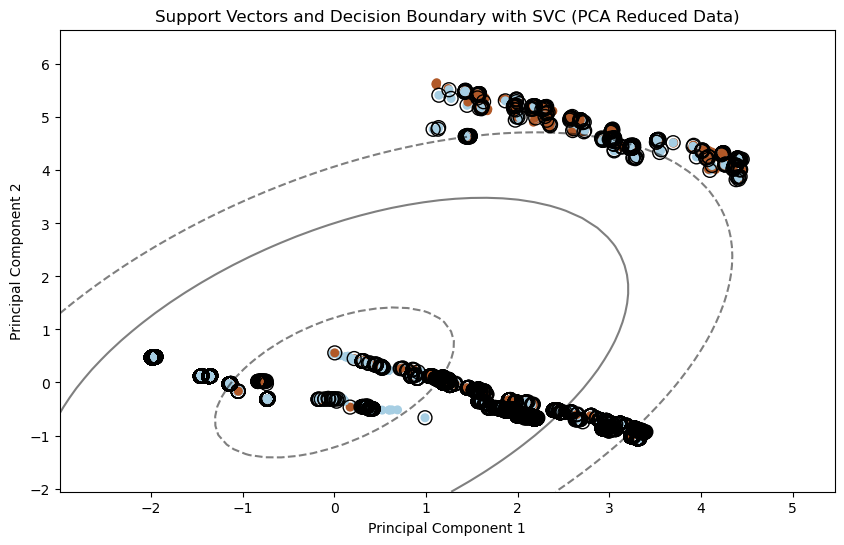

Accuracy on test data with SVC: 0.8801
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9108
           1       0.47      0.32      0.38      1189

    accuracy                           0.88     10297
   macro avg       0.69      0.63      0.66     10297
weighted avg       0.86      0.88      0.87     10297



In [699]:
plt.figure(figsize=(10, 6))
ax = plt.gca()


# Create a decision boundary plot
DecisionBoundaryDisplay.from_estimator(
    svc_Evaluation,
    X_train_pca,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)

# Plot the data points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# Plot the support vectors
plt.scatter(
    svc_Evaluation.support_vectors_[:, 0],
    svc_Evaluation.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.title("Support Vectors and Decision Boundary with SVC (PCA Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Evaluate the model on the test set
y_pred_sv = svc_Evaluation.predict(X_test_pca)
sv_accuracy = accuracy_score(y_test, y_pred_sv)
print(f'Accuracy on test data with SVC: {sv_accuracy:.4f}')

# Print the classification report
print(classification_report(y_test, y_pred_sv))

##### Questions